### Imports ane load data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
!pip install pytorch_lightning

     |████████████████████████████████| 317kB 2.8MB/s 
     |████████████████████████████████| 276kB 8.8MB/s 
     |████████████████████████████████| 829kB 11.9MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=b7bf53ff761fb701b1859f67ac9413ca4402284252f93c7166f1240e17afa466
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=0d677fc67a62b01cf5f3cb587030255f8427e1c72bcc78e669b8ab8aa7fb34e3
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built PyYAML future
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler
import pytorch_lightning as pl
from pytorch_lightning import Trainer
# from pytorch_lightning.metrics.classification import F1 
from pytorch_lightning.metrics.sklearns import F1

In [ ]:
import os
os.chdir('/content/gdrive/My Drive/ieeebigmm')

In [ ]:
!pip install -U sentence-transformers
!pip install contractions

     |████████████████████████████████| 71kB 2.0MB/s 
     |████████████████████████████████| 778kB 7.2MB/s 
     |████████████████████████████████| 1.1MB 30.4MB/s 
     |████████████████████████████████| 3.0MB 38.5MB/s 
     |████████████████████████████████| 890kB 43.0MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.0-cp36-none-any.whl size=86756 sha256=2950cf3820d95f98a58c3fa75688a0d49954e74af5bcf9ffe8f9618bcda6cfce
  Stored in directory: /root/.cache/pip/wheels/b8/23/85/85d6a9a6c68f0625a1ecdaad903bb0a78df058c10cf74f9de4
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=cfc4ee9f297bbeb9f4f6ef7125b217716f24f067a7e22a2c6e9cf7217a6ae6d6
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses
     |████████████████████████████████| 245kB 3.7MB/s 
     |████████████████████████████████| 317kB 15.2MB/s 
  Cr

In [ ]:
from loaders import *
import contractions
from nltk.probability import FreqDist
from wordcloud import WordCloud,ImageColorGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cleaned_df=pd.read_csv('/content/gdrive/My Drive/ieeebigmm/preprocessed.csv')
cleaned_df.index=cleaned_df['Unnamed: 0'].values
cleaned_df=cleaned_df[cleaned_df['cleaned_title'].isnull()==False]

In [ ]:
len(cleaned_df)

14493

### Preprocess

In [ ]:
def expand(x):
  l=[contractions.fix(word) for word in x.split()]
  return ' '.join(l)
# remove ’s.
cleaned_df['cleaned_title']=cleaned_df['cleaned_title'].apply(lambda x: re.sub(r'’s','\'s',x))
# replace & with and 
cleaned_df['cleaned_title']=cleaned_df['cleaned_title'].apply(lambda x: re.sub(r'&','and',x))
# expand contractions.
cleaned_df['cleaned_title']=cleaned_df['cleaned_title'].apply(expand)

In [ ]:
cleaned_df.head()

,Unnamed: 0,Unnamed: 0.1,text,images,top_img,title,source,label,cleaned_title,cleaned_text
1716,1716,0,Luann D’Agostino has spent 10 years on The Rea...,['https://imagesvc.meredithcorp.io/v3/mm/image...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,RHONY: Luann D'Agostino Defends Her Drunken Me...,https://people.com,1,rhony luann d'agostino defends her drunken mex...,luann d’agostino has spent years on the real h...
1717,1717,0,Are Beyonce & JAY-Z in over their heads? We le...,['http://pixel.quantserve.com/pixel?a.1=p-6fKi...,https://pmchollywoodlife.files.wordpress.com/2...,Beyonce & JAY-Z Had No Idea Raising Twins Woul...,http://hollywoodlife.com,0,beyonce and jay z had no idea raising twins wo...,are beyonce & jay z in over their heads we lea...
1718,1718,0,Wow! Britney Spears just blew our minds with I...,['http://pixel.quantserve.com/pixel?a.1=p-6fKi...,https://pmchollywoodlife.files.wordpress.com/2...,Britney Spears Steals The NYE Show With A Sizz...,http://hollywoodlife.com,0,britney spears steals the nye show with a sizz...,wow britney spears just blew our minds with in...
1719,1719,0,The Emmy Awards mark the official kick off to ...,['https://imagesvc.meredithcorp.io/v3/mm/image...,https://imagesvc.meredithcorp.io/v3/mm/image?u...,Emmy Awards 2017 Stars Getting Ready,https://people.com,1,emmy awards stars getting ready,the emmy awards mark the official kick off to ...
1720,1720,0,As mermaid hair continues to dominate the red ...,['https://i2.wp.com/lastylemagazine.com/wp-con...,https://i1.wp.com/lastylemagazine.com/wp-conte...,How Mandy Moore’s Hairstylist Created Her Merm...,http://www.lastylemagazine.com,1,how mandy moore's hairstylist created her merm...,as mermaid hair continues to dominate the red ...


In [ ]:
stop_words=set(stopwords.words('english'))
def remove_stopwords(x):
  tokenised=word_tokenize(x)
  no_stopwords=[word for word in tokenised if word not in stop_words]
  return ' '.join(no_stopwords)
cleaned_df['cleaned_title']=cleaned_df['cleaned_title'].apply(remove_stopwords)

###EDA

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from textblob import Word
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
import seaborn as sns

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
df_eda=pd.read_csv('/content/gdrive/My Drive/ieeebigmm/preprocessed.csv')
df_eda.index=df_eda['Unnamed: 0'].values
df_eda=df_eda[df_eda['cleaned_title'].isnull()==False]

In [ ]:
# expand the contractions using the library contractions

def expand(x):
  l=[contractions.fix(word) for word in x.split()]
  return ' '.join(l)
# remove ’s.
df_eda['cleaned_title']=df_eda['cleaned_title'].apply(lambda x: re.sub(r'’s','\'s',x))
# replace & with and 
df_eda['cleaned_title']=df_eda['cleaned_title'].apply(lambda x: re.sub(r'&','and',x))
# expand contractions.
df_eda['cleaned_title']=df_eda['cleaned_title'].apply(expand)

df_eda['cleaned_text']=df_eda['cleaned_text'].apply(lambda x: re.sub(r'’s','\'s',x))
# replace & with and 
df_eda['cleaned_text']=df_eda['cleaned_text'].apply(lambda x: re.sub(r'&','and',x))
# expand contractions.
df_eda['cleaned_text']=df_eda['cleaned_text'].apply(expand)

In [ ]:
# get the titles of the news-headlines
titles = list(df_eda['cleaned_title'].values)

In [ ]:
# Get the count of each Label
df_eda['label'].value_counts()

1    11083
0     3410
Name: label, dtype: int64

In [ ]:
# Get the fake and real news separately
fake_news=df_eda[df_eda['label']==0]
real_news=df_eda[df_eda['label']==1]

In [ ]:
fake_news_titles = list(fake_news['cleaned_title'])
real_news_titles = list(real_news['cleaned_title'])

In [ ]:
# function to calculate sentiment score of title/text of a news
def senti_score(text):
  
  sia = SentimentIntensityAnalyzer()
  sentiment_score = (sia.polarity_scores(text))['compound']

  return sentiment_score

In [ ]:
df_eda['title_sentiment'] = df_eda.apply(lambda x: senti_score(x['cleaned_title']), axis=1)

In [ ]:
fake_news_sentiment = list(df_eda[df_eda['label']==0]['title_sentiment'])

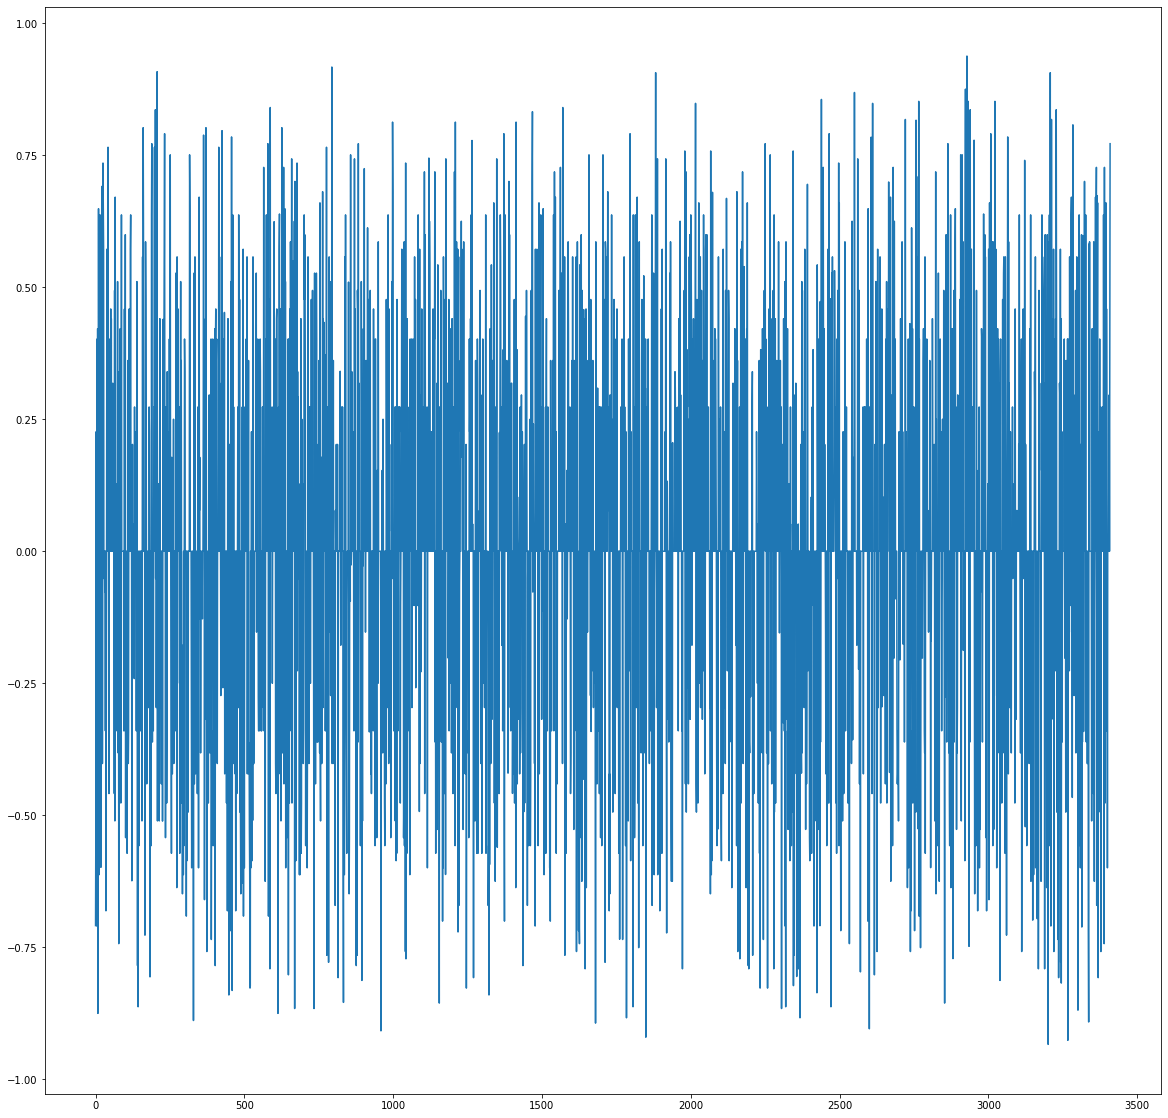

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
plt.plot(fake_news_sentiment)
plt.show()

In [ ]:
# from the graph we can infer that sentiment is that related with fake news. 
#As the sentiment varies for the fake news

In [ ]:
# length of title
df_eda['length_title'] = df_eda['cleaned_title'].apply(len)

In [ ]:
#unique pos tags
def unique_pos(edit):

    a = TextBlob(edit)
    pos_tags = a.tags

    tags = []

    for tag in pos_tags:
      tags.append(tag[1])

    return len(list(set(tags)))

In [ ]:
df_eda['no_of_unique_pos'] = df_eda['cleaned_title'].apply(unique_pos)

In [ ]:
df_eda.head()

In [ ]:
# Storing the actual word in a list of tags
noun_tags = ['NN','NNP','NNPS','NNS','PRP','PRP$']
adjective_tags = ['JJ','JJR','JJS']
adverb_tags = ['RB','RBR','RBS']
verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

In [ ]:
# get the actual words associated with the tags
noun_list = []
adjective_list = []
adverb_list = []
verb_list = []

for title in titles:

  adj = []
  advb = []
  verb = []

  c = TextBlob(title)
  pos_tags = c.tags

  for tag in pos_tags:
    if tag[1] in adjective_tags:
      adj.append(tag[0])
    elif tag[1] in adverb_tags:
      advb.append(tag[0])
    elif tag[1] in verb_tags:
      verb.append(tag[0])
  
  noun_list.append(list(set(c.noun_phrases)))
  adjective_list.append(list(set(adj)))
  adverb_list.append(list(set(advb)))
  verb_list.append(list(set(verb)))

In [ ]:
# getting the count of each noun,adj,adv,verb tags
no_of_noun = []
no_of_adj = []
no_of_adv = []
no_of_verb = []

for i in range(len(noun_list)):
  a = len(noun_list[i])
  no_of_noun.append(a)

for i in range(len(adjective_list)):
  a = len(adjective_list[i])
  no_of_adj.append(a)

for i in range(len(adverb_list)):
  a = len(adverb_list[i])
  no_of_adv.append(a)

for i in range(len(verb_list)):
  a = len(verb_list[i])
  no_of_verb.append(a)

In [ ]:
df_eda['no_of_noun'] = no_of_noun 
df_eda['no_of_adj'] = no_of_adj 
df_eda['no_of_adv'] = no_of_adv 
df_eda['no_of_verb'] = no_of_verb

In [ ]:
# number of words
df_eda['num_words_title'] = df_eda['cleaned_text'].apply(lambda x: len(x.split()))

In [ ]:
# Join the titles into a single string to get n-grams
fake_news_titles_one_string = ' '.join(fake_news_titles)
real_news_titles_one_string = ' '.join(real_news_titles)

In [ ]:
# function to calculate n-grams
import re
from itertools import tee, islice

def ngrams(lst, n):
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break

In [ ]:
# pass the second argument in ngrams function as per requirement
# n = 2 : Bi-grams
# n = 3 : Tri-grams
words_fake = re.findall("\w+", fake_news_titles_one_string)
cnt_fake = Counter(ngrams(words_fake, 2))
cnt_fake.most_common()

[(('brad', 'pitt'), 239),
 (('angelina', 'jolie'), 170),
 (('jennifer', 'aniston'), 168),
 (('selena', 'gomez'), 154),
 (('kim', 'kardashian'), 146),
 (('justin', 'bieber'), 129),
 (('meghan', 'markle'), 127),
 (('news', 'and'), 119),
 (('entertainment', 'news'), 116),
 (('latest', 'entertainment'), 114),
 (('and', 'celeb'), 114),
 (('celeb', 'gossip'), 114),
 (('blake', 'shelton'), 112),
 (('kylie', 'jenner'), 95),
 (('kanye', 'west'), 94),
 (('gwen', 'stefani'), 91),
 (('justin', 'theroux'), 84),
 (('katie', 'holmes'), 73),
 (('taylor', 'swift'), 71),
 (('prince', 'harry'), 71),
 (('she', 'is'), 69),
 (('ben', 'affleck'), 68),
 (('caitlyn', 'jenner'), 64),
 (('pitt', 'and'), 63),
 (('jamie', 'foxx'), 58),
 (('jennifer', 'lopez'), 55),
 (('and', 'justin'), 54),
 (('did', 'not'), 52),
 (('kate', 'middleton'), 51),
 (('kourtney', 'kardashian'), 49),
 (('jennifer', 'garner'), 48),
 (('robert', 'pattinson'), 48),
 (('katy', 'perry'), 44),
 (('he', 'is'), 43),
 (('khloe', 'kardashian'), 43

In [ ]:
words_real = re.findall("\w+", real_news_titles_one_string)
cnt_real = Counter(ngrams(words_real, 2))
cnt_real.most_common()

[(('meghan', 'markle'), 224),
 (('kim', 'kardashian'), 197),
 (('of', 'the'), 182),
 (('at', 'the'), 176),
 (('from', 'the'), 162),
 (('prince', 'harry'), 156),
 (('taylor', 'swift'), 150),
 (('on', 'the'), 138),
 (('in', 'the'), 135),
 (('kylie', 'jenner'), 128),
 (('red', 'carpet'), 123),
 (('selena', 'gomez'), 120),
 (('it', 'is'), 111),
 (('this', 'is'), 105),
 (('is', 'the'), 104),
 (('she', 'is'), 104),
 (('net', 'worth'), 103),
 (('the', 'best'), 103),
 (('with', 'the'), 96),
 (('the', 'world'), 95),
 (('all', 'the'), 93),
 (('how', 'to'), 92),
 (('royal', 'wedding'), 91),
 (('music', 'awards'), 89),
 (('here', 's'), 88),
 (('and', 'more'), 87),
 (('khloe', 'kardashian'), 87),
 (('is', 'not'), 85),
 (('to', 'the'), 82),
 (('see', 'the'), 81),
 (('opens', 'up'), 81),
 (('up', 'about'), 81),
 (('real', 'housewives'), 80),
 (('says', 'she'), 80),
 (('of', 'her'), 80),
 (('news', 'from'), 79),
 (('and', 'the'), 79),
 (('breaking', 'news'), 78),
 (('fashion', 'and'), 77),
 (('world',

In [ ]:
# remove stopwords from title and text
stop_words=set(stopwords.words('english'))
def remove_stopwords(x):
  tokenise = word_tokenize(x)
  no_stopwords = [word for word in tokenise if word not in stop_words]
  return ' '.join(no_stopwords)

df_eda['cleaned_title']=df_eda['cleaned_title'].apply(remove_stopwords)
df_eda['cleaned_text']=df_eda['cleaned_text'].apply(remove_stopwords)

In [ ]:
#wordcloud
def corpus(df):
  words=list(df['cleaned_title'].apply(lambda x: word_tokenize(x)))
  all_words=[]
  for wordlist in words:
    all_words+=wordlist
  return all_words

def corpus_text(df):
  words=list(df['cleaned_text'].apply(lambda x: word_tokenize(x)))
  all_words=[]
  for wordlist in words:
    all_words+=wordlist
    # all_words.remove("said '")
    # all_words.remove('one')
    # all_words.remove('time')
    # all_words.remove('like')
    # all_words.remove('new')
    # print(all_words[15])
  return all_words       

def display_wordcloud(all_words):

  most_common=FreqDist(all_words).most_common(100)
  wordcloud=WordCloud(background_color='white').generate(str(most_common))
  fig=plt.figure(figsize=(10,10),facecolor='white')
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title('Common words',fontsize=50)
  plt.show()

In [ ]:
all_fake_words=corpus(fake_news)
all_real_words=corpus(real_news)

all_fake_words_text=corpus_text(fake_news)
all_real_words_text=corpus_text(real_news)

Title

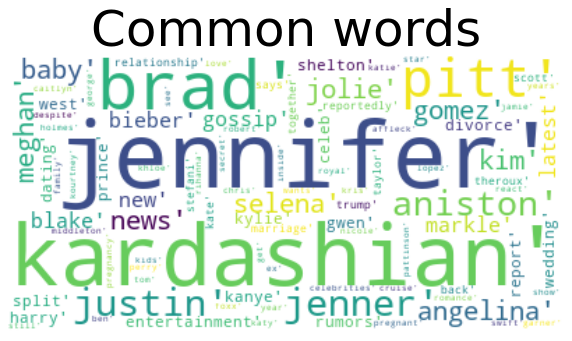

In [ ]:
display_wordcloud(all_fake_words)

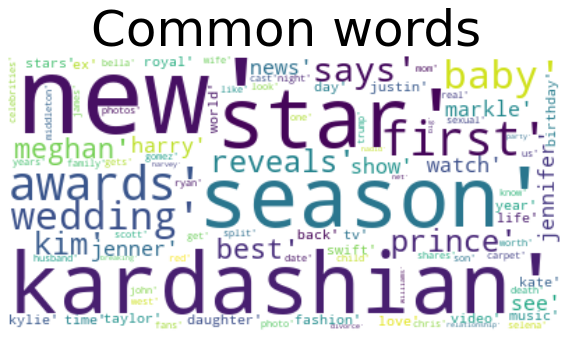

In [ ]:
display_wordcloud(all_real_words)

Text

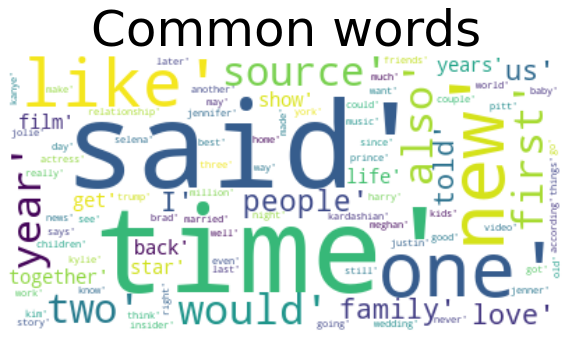

In [ ]:
display_wordcloud(all_fake_words_text)

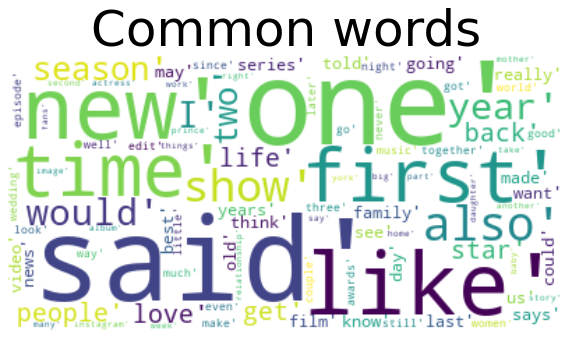

In [ ]:
display_wordcloud(all_real_words_text)

In [ ]:
# stemming and lemmatization for tf-idf
def preprocess(headline):

  st = PorterStemmer()
  # Stemming
  a = " ".join([st.stem(word) for word in headline.split()])
  # Lemmatization
  a = " ".join([Word(word).lemmatize() for word in a.split()])
  return a

In [ ]:
cleaned_df['cleaned_title'][15304]

'kylie jenner named baby stormi revealed last name'

In [ ]:
df_eda['cleaned_title']=df_eda['cleaned_title'].apply(preprocess)
df_eda['cleaned_text']=df_eda['cleaned_text'].apply(preprocess)

In [ ]:
df_eda['cleaned_title'][1716]

"rhoni luann d'agostino defend drunken mexico fall"

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_title = vectorizer.fit_transform(df_eda['cleaned_title'])

In [ ]:
tfidf_title.shape

(14493, 9811)